In [81]:
import pandas as pd
#del _38
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
print(alldfs)


['df', 'pandas_df']


In [2]:
import pyspark
import os
os.getcwd()
import findspark
findspark.init('/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/pyspark')
print ("Hey Priyanka")
from pyspark.sql import Row
from pyspark.sql import functions
from pyspark.sql import SQLContext
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark.sql.functions as func
from pyspark.sql import SparkSession
import pandas as pd


spark = SparkSession.builder.config("spark.sql.warehouse.dir", "file:///C:/temp").appName("SparkSQL").getOrCreate()

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G'))
sqlContext = SQLContext(sc)
sc

Hey Priyanka


<SparkContext master=local[*] appName=SparkSQL>

In [3]:
#Using panda dataframe to import the table
df = pd.read_csv(r'/Users/priyankapatil/Desktop/Data/dataset_flight.csv',sep=',',nrows=100000)

In [4]:
df.drop(["TAIL_NUM", "TAXI_OUT","TAXI_IN"], axis=1, inplace=True)

In [5]:
# Convert object columns to numeric cols
numeric_cols = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'CRS_ARR_TIME']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, downcast='integer', errors='coerce', axis=1)

In [6]:
# Convert object columns to float cols
float_cols = ['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
              'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float', errors='coerce')


In [7]:
print (df.dtypes)

YEAR                     int16
QUARTER                  int16
MONTH                    int16
DAY_OF_MONTH             int16
DAY_OF_WEEK              int16
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int16
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int16
DEP_TIME               float32
DEP_DELAY              float32
CRS_ARR_TIME             int16
ARR_TIME               float32
ARR_DELAY              float32
CANCELLED              float32
CANCELLATION_CODE       object
DIVERTED               float32
CRS_ELAPSED_TIME       float32
ACTUAL_ELAPSED_TIME    float32
AIR_TIME               float32
DISTANCE               float32
CARRIER_DELAY          float32
WEATHER_DELAY          float32
NAS_DELAY              float32
SECURITY_DELAY         float32
LATE_AIRCRAFT_DELAY    float32
Unnamed: 30            float64
dtype: object


In [9]:
df_flown = df.query("CANCELLED == 0")

In [10]:
df_flown.shape

(98644, 28)

In [11]:
df_flown = df_flown.dropna(subset=['DEP_DELAY', 'ARR_TIME','ARR_DELAY','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME'], how='any')

In [12]:
# Verification of dropping of nulls
df_flown.DEP_DELAY.isna().sum(), df_flown.ARR_TIME.isna().sum(), df_flown.ARR_DELAY.isna().sum(), \
df_flown.CRS_ELAPSED_TIME.isna().sum(), df_flown.ACTUAL_ELAPSED_TIME.isna().sum()

(0, 0, 0, 0, 0)

In [13]:
#df_flown['DEP_DEL15'] = df_flown.where(df_flown['DEP_DELAY'] > 15, 1,0)
df_flown['DEP_DEL15'] = (df_flown['DEP_DELAY'] > 15).astype(float)
df_flown.head(100)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 30,DEP_DEL15
0,2018,2,4,24,2,UA,2055,SFO,PDX,1200,...,116.0,75.0,550.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2018,2,4,24,2,UA,2054,PDX,SFO,1442,...,105.0,85.0,550.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2018,2,4,24,2,UA,2053,MCO,IAH,1708,...,153.0,132.0,854.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2018,2,4,24,2,UA,2052,FAT,SFO,605,...,57.0,31.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2018,2,4,24,2,UA,2051,TPA,SFO,805,...,343.0,322.0,2393.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2018,2,4,24,2,UA,2050,MYR,EWR,1307,...,120.0,81.0,550.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,2018,2,4,24,2,UA,2049,DEN,IAH,1523,...,141.0,115.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2018,2,4,24,2,UA,2049,LAX,DEN,1050,...,148.0,108.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,2018,2,4,24,2,UA,2048,LAX,LAS,1950,...,69.0,46.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,2018,2,4,24,2,UA,2047,BOS,EWR,1922,...,79.0,52.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [87]:
pandas_df['CRS_DEP_TIME'] = pandas_df['CRS_DEP_TIME'].mul(100).round(2)
#pandas_df['CRS_ARR_TIME'] = pandas_df['CRS_ARR_TIME'].div(100).round(2)
#pandas_df['CRS_ELAPSED_TIME'] = pandas_df['CRS_ELAPSED_TIME'].div(100).round(2)
pandas_df.head(100)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DEL15,clusters
0,2018,2,4,24,2,UA,2055,SFO,PDX,0.0,...,116.0,75.0,550.0,NaN,NaN,NaN,NaN,NaN,0.0,2
1,2018,2,4,24,2,UA,2054,PDX,SFO,0.0,...,105.0,85.0,550.0,NaN,NaN,NaN,NaN,NaN,0.0,1
2,2018,2,4,24,2,UA,2053,MCO,IAH,0.0,...,153.0,132.0,854.0,NaN,NaN,NaN,NaN,NaN,0.0,1
3,2018,2,4,24,2,UA,2052,FAT,SFO,0.0,...,57.0,31.0,158.0,NaN,NaN,NaN,NaN,NaN,0.0,2
4,2018,2,4,24,2,UA,2051,TPA,SFO,0.0,...,343.0,322.0,2393.0,NaN,NaN,NaN,NaN,NaN,0.0,2
5,2018,2,4,24,2,UA,2050,MYR,EWR,0.0,...,120.0,81.0,550.0,NaN,NaN,NaN,NaN,NaN,0.0,2
6,2018,2,4,24,2,UA,2049,DEN,IAH,0.0,...,141.0,115.0,862.0,NaN,NaN,NaN,NaN,NaN,0.0,1
7,2018,2,4,24,2,UA,2049,LAX,DEN,0.0,...,148.0,108.0,862.0,NaN,NaN,NaN,NaN,NaN,0.0,2
8,2018,2,4,24,2,UA,2048,LAX,LAS,0.0,...,69.0,46.0,236.0,NaN,NaN,NaN,NaN,NaN,0.0,1
9,2018,2,4,24,2,UA,2047,BOS,EWR,0.0,...,79.0,52.0,200.0,NaN,NaN,NaN,NaN,NaN,0.0,1


In [14]:
df_flown=df_flown.loc[:, ~df_flown.columns.str.contains('^Unnamed')]

In [16]:
pandas_df=df_flown

In [15]:
#Create Schema to convert to Spark dataframe
schema = StructType([ StructField("Year", IntegerType(), True)\
                       ,StructField("Quarter", IntegerType(), True)\
                       ,StructField("Month", IntegerType(), True)\
                       ,StructField("Date", IntegerType(), True)\
                       ,StructField("Weekday", IntegerType(), True)\
                       ,StructField("Carrier", StringType(), True)\
                       ,StructField("FlightNo", IntegerType(), True)\
                       ,StructField("Origin", StringType(), True)\
                       ,StructField("Dest", StringType(), True)\
                       ,StructField("SchDep", IntegerType(), True)\
                       ,StructField("Deptime", FloatType(), True)\
                       ,StructField("DepDelay", FloatType(), True)\
                       ,StructField("SchArr", IntegerType(), True)\
                       ,StructField("ArrTime", FloatType(), True)\
                       ,StructField("ArrDelay", FloatType(), True)\
                       ,StructField("Cancelled", FloatType(), True)\
                       ,StructField("Cancelcode", StringType(), True)\
                       ,StructField("Diverted", FloatType(), True)\
                       ,StructField("SchElapsedTime", FloatType(), True)\
                       ,StructField("ElapsedTime", FloatType(), True)\
                       ,StructField("Airtime", FloatType(), True)\
                       ,StructField("Distance", FloatType(), True)\
                       ,StructField("CarrierDelay", FloatType(), True)\
                       ,StructField("WeatherDelay", FloatType(), True)\
                       ,StructField("NASDelay", FloatType(), True)\
                       ,StructField("SecurityDelay", FloatType(), True)\
                       ,StructField("LateAircraftDelay", FloatType(), True)\
                       ,StructField("DepDelay15", FloatType(), True)])
                   #    ,StructField("Unnamed", StringType(), True)])

In [17]:
# initialize Spark session and create spark dataframe
df_flown = spark.createDataFrame(pandas_df, schema=schema)
df_flown.show(5)

+----+-------+-----+----+-------+-------+--------+------+----+------+-------+--------+------+-------+--------+---------+----------+--------+--------------+-----------+-------+--------+------------+------------+--------+-------------+-----------------+----------+
|Year|Quarter|Month|Date|Weekday|Carrier|FlightNo|Origin|Dest|SchDep|Deptime|DepDelay|SchArr|ArrTime|ArrDelay|Cancelled|Cancelcode|Diverted|SchElapsedTime|ElapsedTime|Airtime|Distance|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|DepDelay15|
+----+-------+-----+----+-------+-------+--------+------+----+------+-------+--------+------+-------+--------+---------+----------+--------+--------------+-----------+-------+--------+------------+------------+--------+-------------+-----------------+----------+
|2018|      2|    4|  24|      2|     UA|    2055|   SFO| PDX|  1200| 1155.0|    -5.0|  1351| 1351.0|     0.0|      0.0|       NaN|     0.0|         111.0|      116.0|   75.0|   550.0|         NaN|         NaN| 

In [40]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark import SparkContext
# from sklearn.cluster import KMeans
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
# 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', label= 'DEP_DEL15'

dataset= df_flown.rdd.map(lambda x:(Vectors.dense([float(x[4]),float(x[9]),float(x[12]),float(x[18]),float(x[21])]),x[27]))
dataset= sqlContext.createDataFrame(dataset,["features","label"])
dataset.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[2.0,1200.0,1351....|  0.0|
|[2.0,1442.0,1632....|  0.0|
|[2.0,1708.0,1848....|  0.0|
|[2.0,605.0,702.0,...|  0.0|
|[2.0,805.0,1101.0...|  0.0|
|[2.0,1307.0,1500....|  0.0|
|[2.0,1523.0,1846....|  0.0|
|[2.0,1050.0,1418....|  0.0|
|[2.0,1950.0,2107....|  0.0|
|[2.0,1922.0,2050....|  0.0|
|[2.0,1304.0,1754....|  0.0|
|[2.0,1252.0,2100....|  0.0|
|[2.0,1707.0,2023....|  0.0|
|[2.0,1400.0,1509....|  0.0|
|[2.0,535.0,1110.0...|  0.0|
|[2.0,601.0,848.0,...|  0.0|
|[2.0,755.0,1100.0...|  0.0|
|[2.0,600.0,1414.0...|  0.0|
|[2.0,1015.0,1342....|  0.0|
|[2.0,820.0,1427.0...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [68]:
from pyspark.ml.clustering import KMeans

# Trains a k-means model.
kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(dataset)

In [69]:
# Make predictions
predictions = model.transform(dataset)

In [70]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.6435714841682477


In [71]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[   3.74783358 1741.26895618 1924.83119153  110.3955933   538.32200886]
[   3.73028688  906.26896857 1087.13967286  111.47762861  545.15938016]
[   3.52802385 1258.25400341 1648.87146508  251.81507666 1703.73620102]
[   3.53184838 2144.92887847  220.23876514  202.23446659 1424.65181712]


In [38]:
pandas_df.head(10000)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DEL15,clusters
0,2018,2,4,24,2,UA,2055,SFO,PDX,1200,...,116.0,75.0,550.0,NaN,NaN,NaN,NaN,NaN,0.0,2
1,2018,2,4,24,2,UA,2054,PDX,SFO,1442,...,105.0,85.0,550.0,NaN,NaN,NaN,NaN,NaN,0.0,1
2,2018,2,4,24,2,UA,2053,MCO,IAH,1708,...,153.0,132.0,854.0,NaN,NaN,NaN,NaN,NaN,0.0,1
3,2018,2,4,24,2,UA,2052,FAT,SFO,605,...,57.0,31.0,158.0,NaN,NaN,NaN,NaN,NaN,0.0,2
4,2018,2,4,24,2,UA,2051,TPA,SFO,805,...,343.0,322.0,2393.0,NaN,NaN,NaN,NaN,NaN,0.0,2
5,2018,2,4,24,2,UA,2050,MYR,EWR,1307,...,120.0,81.0,550.0,NaN,NaN,NaN,NaN,NaN,0.0,2
6,2018,2,4,24,2,UA,2049,DEN,IAH,1523,...,141.0,115.0,862.0,NaN,NaN,NaN,NaN,NaN,0.0,1
7,2018,2,4,24,2,UA,2049,LAX,DEN,1050,...,148.0,108.0,862.0,NaN,NaN,NaN,NaN,NaN,0.0,2
8,2018,2,4,24,2,UA,2048,LAX,LAS,1950,...,69.0,46.0,236.0,NaN,NaN,NaN,NaN,NaN,0.0,1
9,2018,2,4,24,2,UA,2047,BOS,EWR,1922,...,79.0,52.0,200.0,NaN,NaN,NaN,NaN,NaN,0.0,1


In [72]:
from scipy import stats

#Standardize columns for predictions
clmns = ['DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DEP_DELAY','DEP_DELAY','DEP_DEL15']
df_tr_std = stats.zscore(pandas_df[clmns])
print(df_tr_std)

[[-0.85921885 -0.2620972  -0.24986961 ... -0.31632313 -0.31632313
  -0.44011744]
 [-0.85921885  0.23608964  0.29688252 ... -0.33908016 -0.33908016
  -0.44011744]
 [-0.85921885  0.78368343  0.71716175 ... -0.43010828 -0.43010828
  -0.44011744]
 ...
 [ 0.14681872  1.29216339  1.41568138 ... -0.04323878 -0.04323878
  -0.44011744]
 [ 0.6498375   1.29216339  1.41568138 ... -0.2935661  -0.2935661
  -0.44011744]
 [ 1.15285628  1.29216339  1.41568138 ... -0.24805204 -0.24805204
  -0.44011744]]


In [73]:
from sklearn.cluster import KMeans

#Cluster the data
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
pandas_df['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

In [74]:
#Lets analyze the clusters
print(pandas_df[clmns].groupby(['clusters']).mean())

          DAY_OF_WEEK  CRS_DEP_TIME  CRS_ARR_TIME  CRS_ELAPSED_TIME  \
clusters                                                              
0            3.714502   1509.855601   1641.614227        131.091339   
1            3.702609   1716.757393   1905.307534        130.041382   
2            3.722298    940.670869   1067.916105        129.954865   
3            3.314394   1373.812121   1559.485606        135.412125   

           DEP_DELAY   DEP_DELAY  DEP_DEL15  
clusters                                     
0          52.077869   52.077869   1.000000  
1          -2.602275   -2.602275   0.000000  
2          -3.342946   -3.342946   0.000358  
3         272.803802  272.803802   1.000000  


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

(0, 5254.44199703918)

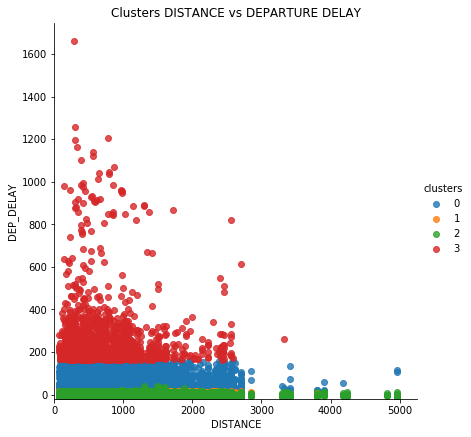

In [76]:
#Scatter plot of Departure delay and Arrival Delay leaving from Tampa airport
sns.lmplot('DISTANCE', 'DEP_DELAY', 
           data=pandas_df, 
           fit_reg=False, 
           hue='clusters', height = 6)
plt.title('Clusters DISTANCE vs DEPARTURE DELAY')
plt.xlabel('DISTANCE')
plt.ylabel('DEP_DELAY')

plt.ylim(-20, None)
plt.xlim(0, None)